In [39]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
from matplotlib import pyplot as plt

In [40]:
matplotlib.rcParams["figure.figsize"] = (20,10)

In [41]:
df1 = pd.read_csv("/kaggle/input/new-york-housing-market/NY-House-Dataset.csv")
df1.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [42]:
df1.shape


(4801, 17)

In [43]:
df2 = df1.dropna()
df2.shape

(4801, 17)

In [44]:
df2['SUBLOCALITY'].unique()

array(['Manhattan', 'New York County', 'Richmond County', 'Kings County',
       'New York', 'East Bronx', 'Brooklyn', 'The Bronx', 'Queens',
       'Staten Island', 'Queens County', 'Bronx County', 'Coney Island',
       'Brooklyn Heights', 'Jackson Heights', 'Riverdale', 'Rego Park',
       'Fort Hamilton', 'Flushing', 'Dumbo', 'Snyder Avenue'],
      dtype=object)

In [45]:
df3 = df2[['PRICE','BEDS','BATH', 'PROPERTYSQFT', 'SUBLOCALITY']]
df3.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY
0,315000,2,2.000000,1400.0,Manhattan
1,195000000,7,10.000000,17545.0,New York County
2,260000,4,2.000000,2015.0,Richmond County
3,69000,3,1.000000,445.0,New York County
4,55000000,7,2.373861,14175.0,New York County


In [46]:
df3['PRICE_PER_SQFT'] = df3['PRICE']/df3['PROPERTYSQFT']
df3.head()

/tmp/ipykernel_30/2440983568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['PRICE_PER_SQFT'] = df3['PRICE']/df3['PROPERTYSQFT']


,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY,PRICE_PER_SQFT
0,315000,2,2.000000,1400.0,Manhattan,225.000000
1,195000000,7,10.000000,17545.0,New York County,11114.277572
2,260000,4,2.000000,2015.0,Richmond County,129.032258
3,69000,3,1.000000,445.0,New York County,155.056180
4,55000000,7,2.373861,14175.0,New York County,3880.070547


In [47]:
sublocality_stats = df3['SUBLOCALITY'].value_counts(ascending=False)
sublocality_less_than_ten = sublocality_stats[sublocality_stats<=20]
df3.SUBLOCALITY = df3.SUBLOCALITY.apply(lambda x : 'other' if x in sublocality_less_than_ten else x)
print(df3['SUBLOCALITY'].unique)

<bound method Series.unique of 0             Manhattan
1       New York County
2       Richmond County
3       New York County
4       New York County
             ...       
4796           New York
4797      Queens County
4798    New York County
4799             Queens
4800           Brooklyn
Name: SUBLOCALITY, Length: 4801, dtype: object>


/tmp/ipykernel_30/1175642182.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.SUBLOCALITY = df3.SUBLOCALITY.apply(lambda x : 'other' if x in sublocality_less_than_ten else x)


In [48]:
def remove_outliers(df):
    filtered_dfs = []  # Use a list to store filtered sub-DataFrames
    for key, subdf in df.groupby('SUBLOCALITY'):
        mean_price = subdf.PRICE_PER_SQFT.mean()
        std_price = subdf.PRICE_PER_SQFT.std()
        # Filter rows within 1 standard deviation
        reduced_df = subdf[
            (subdf.PRICE_PER_SQFT > (mean_price - std_price)) &
            (subdf.PRICE_PER_SQFT <= (mean_price + std_price))
        ]
        filtered_dfs.append(reduced_df)
    
    # Combine all filtered DataFrames
    return pd.concat(filtered_dfs, ignore_index=True)

In [49]:
df4 = remove_outliers(df3)
df4.shape

(4257, 6)

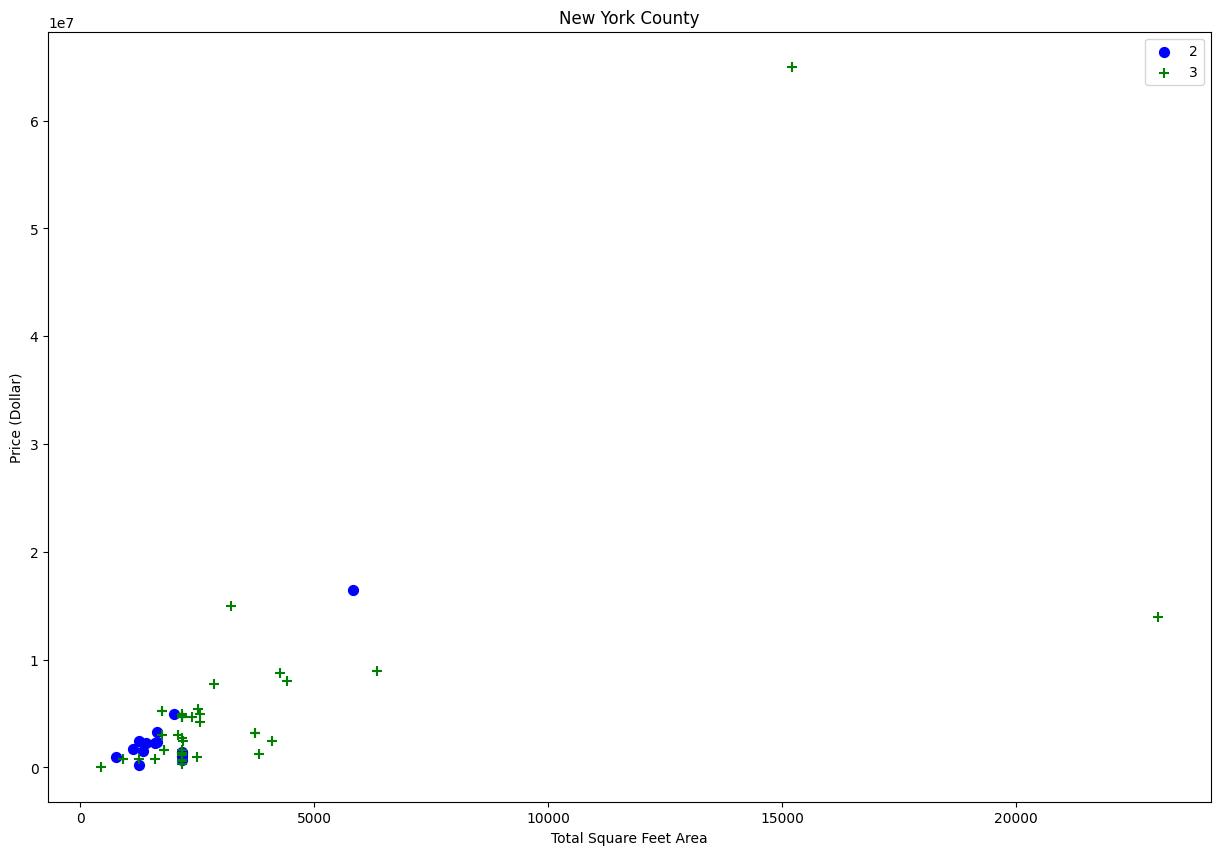

In [50]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.SUBLOCALITY==location) & (df.BEDS==2)]
    bhk3 = df[(df.SUBLOCALITY==location) & (df.BEDS==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.PROPERTYSQFT,bhk2.PRICE,color='blue',label='2', s=50)
    plt.scatter(bhk3.PROPERTYSQFT,bhk3.PRICE,marker='+', color='green',label='3', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Dollar)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df4,"New York County")

In [51]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('SUBLOCALITY'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BEDS'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.PRICE_PER_SQFT),
                'std': np.std(bhk_df.PRICE_PER_SQFT),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BEDS'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.PRICE_PER_SQFT<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df5 = remove_bhk_outliers(df4)

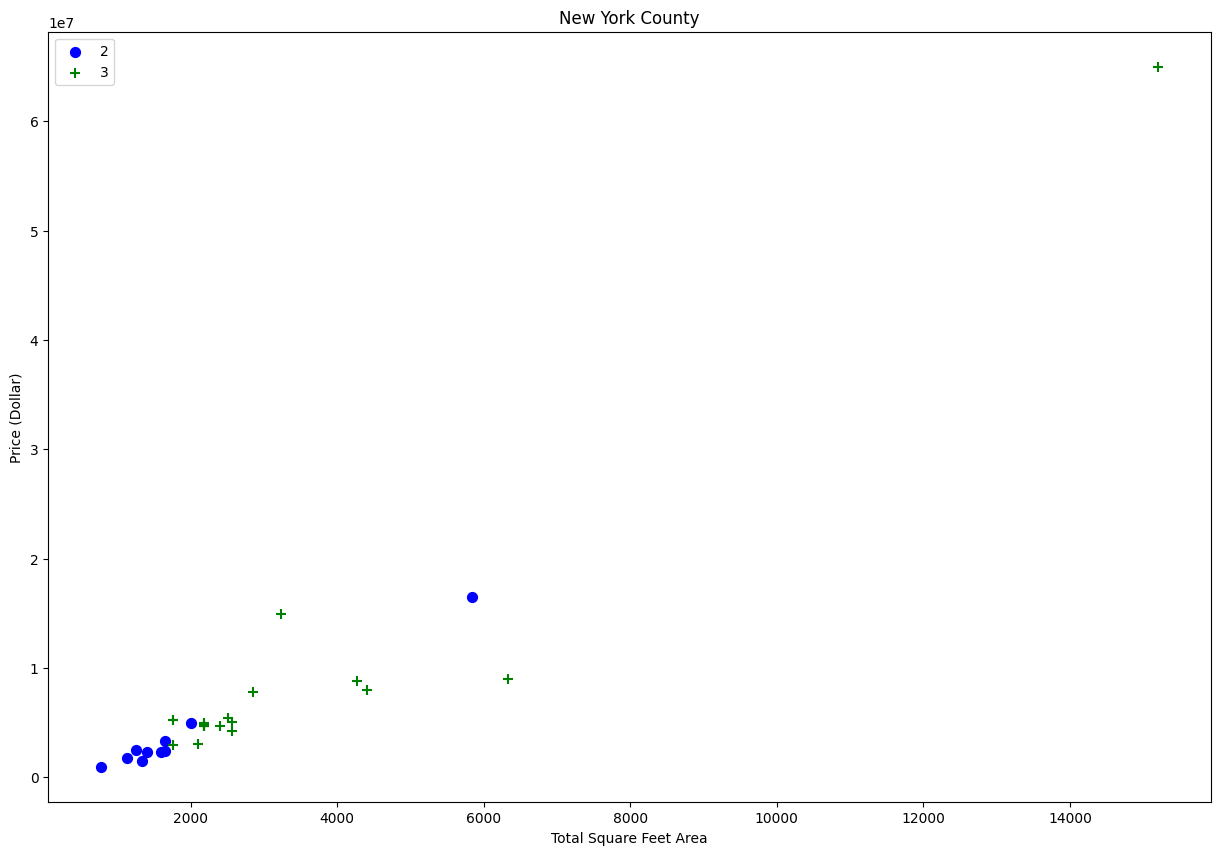

In [52]:
plot_scatter_chart(df5,"New York County")

Text(0, 0.5, 'Count')

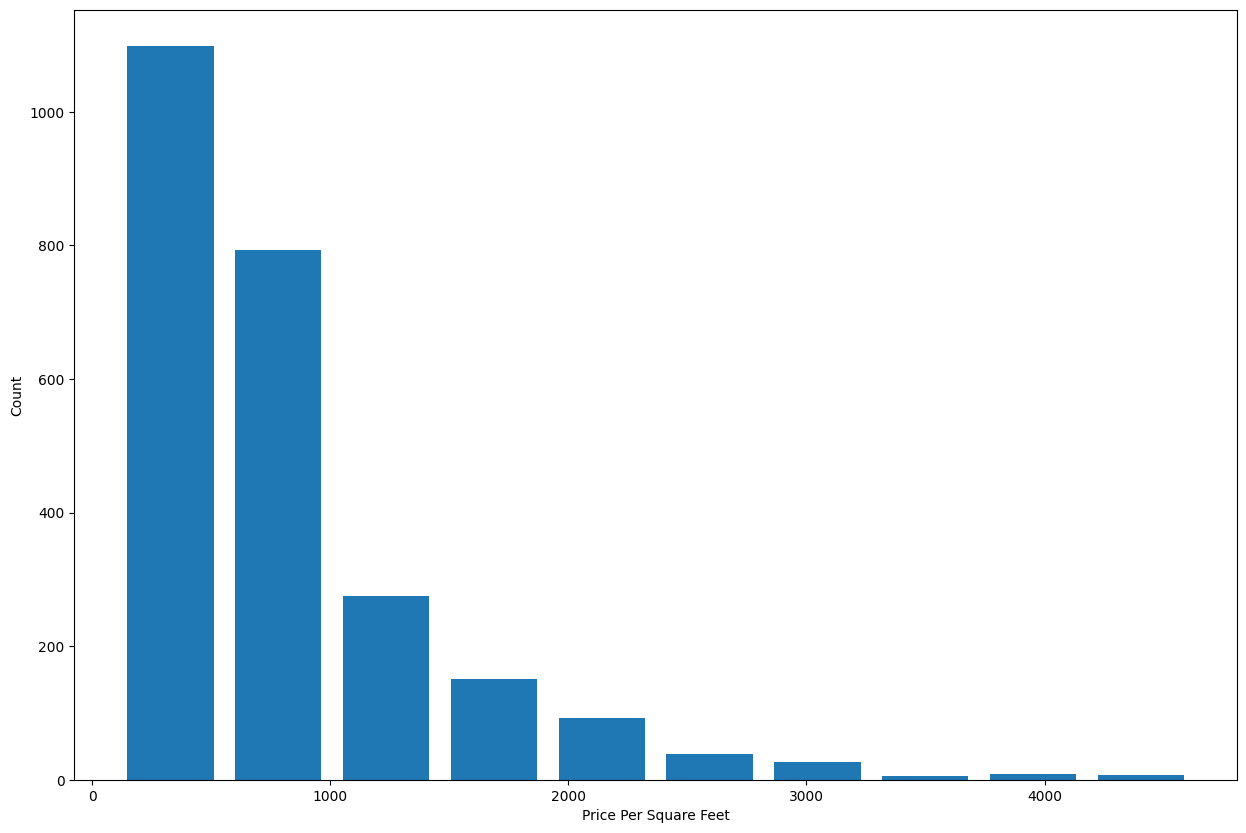

In [53]:
plt.hist(df5.PRICE_PER_SQFT,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

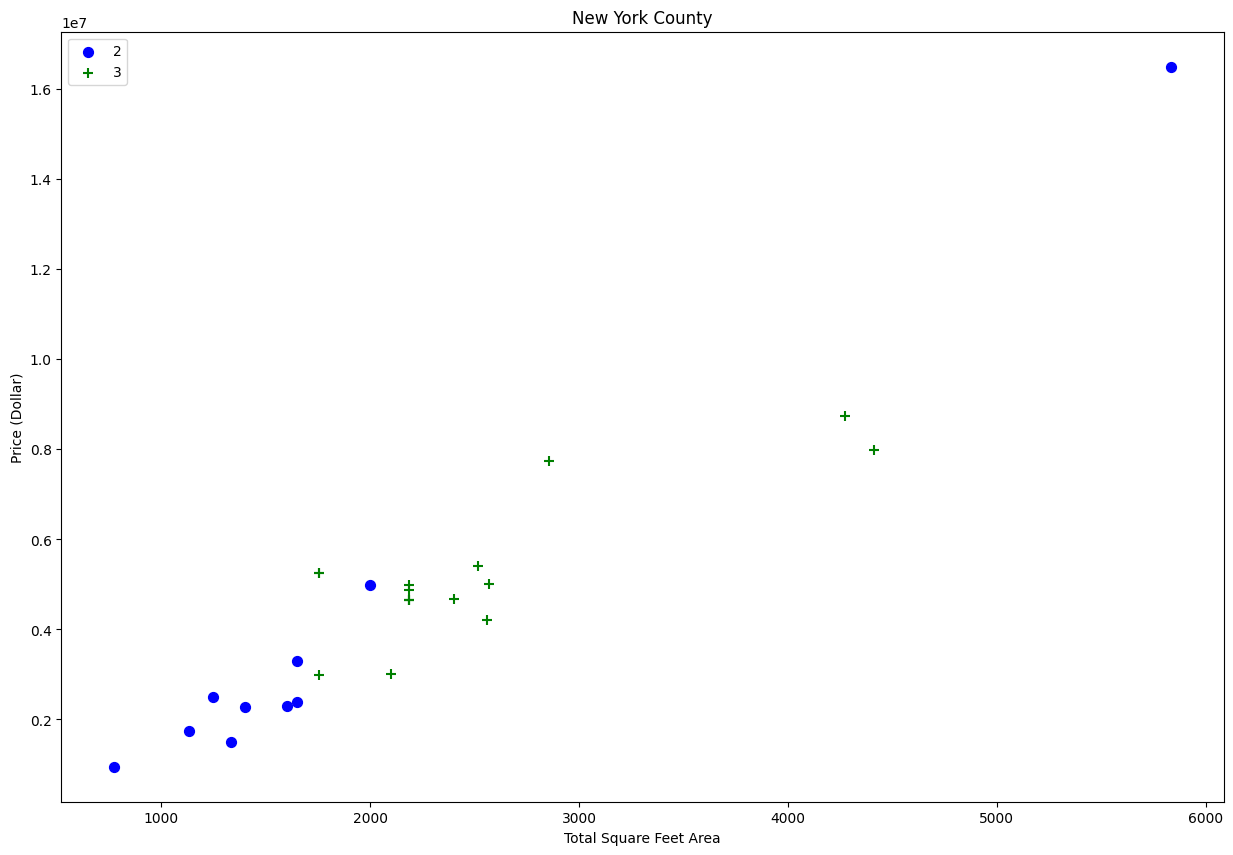

In [54]:
df6 = df5[df5.BATH<df5.BEDS+2]
df6 = df6[df6.PRICE_PER_SQFT < 3500]
df6.shape
plot_scatter_chart(df6,"New York County")

In [55]:
df7 = df6.drop(['PRICE_PER_SQFT'],axis='columns')
df7.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY
0,1100000,6,3.000000,2837.000000,Bronx County
9,1249000,3,2.373861,2184.207862,Bronx County
13,650000,3,2.373861,1638.000000,Bronx County
16,1300000,3,2.000000,2184.207862,Bronx County
17,1300000,3,2.000000,2184.207862,Bronx County


# Linear Regression Training

In [56]:
dummies = pd.get_dummies(df7.SUBLOCALITY)  # Creates 0/1 variables
dummies = dummies.astype(int)
dummies.head()

,Bronx County,Brooklyn,Kings County,Manhattan,New York,New York County,Queens,Queens County,Richmond County,Staten Island,The Bronx,other
0,1,0,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0
13,1,0,0,0,0,0,0,0,0,0,0,0
16,1,0,0,0,0,0,0,0,0,0,0,0
17,1,0,0,0,0,0,0,0,0,0,0,0


In [57]:
df8 = pd.concat([df7, dummies.drop('other', axis='columns')], axis='columns')
df8.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY,Bronx County,Brooklyn,Kings County,Manhattan,New York,New York County,Queens,Queens County,Richmond County,Staten Island,The Bronx
0,1100000,6,3.000000,2837.000000,Bronx County,1,0,0,0,0,0,0,0,0,0,0
9,1249000,3,2.373861,2184.207862,Bronx County,1,0,0,0,0,0,0,0,0,0,0
13,650000,3,2.373861,1638.000000,Bronx County,1,0,0,0,0,0,0,0,0,0,0
16,1300000,3,2.000000,2184.207862,Bronx County,1,0,0,0,0,0,0,0,0,0,0
17,1300000,3,2.000000,2184.207862,Bronx County,1,0,0,0,0,0,0,0,0,0,0


In [58]:
location_stats = df8['SUBLOCALITY'].value_counts(ascending=False)
location_stats

SUBLOCALITY
New York           644
Queens County      349
Queens             296
Kings County       289
Brooklyn           249
Richmond County    212
Bronx County       151
New York County    115
The Bronx          103
Staten Island       27
Manhattan           14
other               12
Name: count, dtype: int64

In [59]:
df9 = df8.drop('SUBLOCALITY', axis = 'columns')
df9.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,Bronx County,Brooklyn,Kings County,Manhattan,New York,New York County,Queens,Queens County,Richmond County,Staten Island,The Bronx
0,1100000,6,3.000000,2837.000000,1,0,0,0,0,0,0,0,0,0,0
9,1249000,3,2.373861,2184.207862,1,0,0,0,0,0,0,0,0,0,0
13,650000,3,2.373861,1638.000000,1,0,0,0,0,0,0,0,0,0,0
16,1300000,3,2.000000,2184.207862,1,0,0,0,0,0,0,0,0,0,0
17,1300000,3,2.000000,2184.207862,1,0,0,0,0,0,0,0,0,0,0


In [60]:
X = df9.drop('PRICE', axis='columns')
X.head()

,BEDS,BATH,PROPERTYSQFT,Bronx County,Brooklyn,Kings County,Manhattan,New York,New York County,Queens,Queens County,Richmond County,Staten Island,The Bronx
0,6,3.000000,2837.000000,1,0,0,0,0,0,0,0,0,0,0
9,3,2.373861,2184.207862,1,0,0,0,0,0,0,0,0,0,0
13,3,2.373861,1638.000000,1,0,0,0,0,0,0,0,0,0,0
16,3,2.000000,2184.207862,1,0,0,0,0,0,0,0,0,0,0
17,3,2.000000,2184.207862,1,0,0,0,0,0,0,0,0,0,0


In [61]:
y = df9.PRICE
y.head()

0     1100000
9     1249000
13     650000
16    1300000
17    1300000
Name: PRICE, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

# K Fold cross validation

In [63]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score


In [64]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': make_pipeline(StandardScaler(), LinearRegression()),  # Add scaling to pipeline
            'params': {}  # No need for 'normalize' anymore
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }

    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Assuming X and y are your features and target variable respectively
# Example call to the function
find_best_model_using_gridsearchcv(X, y)


,model,best_score,best_params
0,linear_regression,0.611107,{}
1,decision_tree,0.853895,"{'criterion': 'squared_error', 'splitter': 'be..."


In [65]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7294507889819362

# Test model

In [66]:
def predict_price(location, sqft, bath, bhk):    
    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bhk
    x[1] = bath
    x[2] = sqft
    if loc_index >= 0:
        x[loc_index] = 1  

    return lr_clf.predict([x])[0]


In [67]:
X.head()

,BEDS,BATH,PROPERTYSQFT,Bronx County,Brooklyn,Kings County,Manhattan,New York,New York County,Queens,Queens County,Richmond County,Staten Island,The Bronx
0,6,3.000000,2837.000000,1,0,0,0,0,0,0,0,0,0,0
9,3,2.373861,2184.207862,1,0,0,0,0,0,0,0,0,0,0
13,3,2.373861,1638.000000,1,0,0,0,0,0,0,0,0,0,0
16,3,2.000000,2184.207862,1,0,0,0,0,0,0,0,0,0,0
17,3,2.000000,2184.207862,1,0,0,0,0,0,0,0,0,0,0


In [68]:
predict_price('Brooklyn',1000, 2, 2)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


622250.8042686384

In [69]:
predict_price('Brooklyn',1000, 5, 5)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


26785.414297810057

In [70]:
predict_price('Manhattan',1000, 2, 2)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


1210415.4156810555

In [71]:
predict_price('Manhattan',1000, 2, 2)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


1210415.4156810555

# Export model as pickle

In [72]:
import pickle

# Save the trained model as a pickle file
with open('/kaggle/working/new_york_home_prices_model.pickle', 'wb') as f:
    pickle.dump(lr_clf, f)

# Export columns

In [73]:
import json

# Save feature names to a JSON file
columns = {
    'data_columns': [col.lower() for col in X.columns]
}

with open('/kaggle/working/columns.json', 'w') as f:
    json.dump(columns, f)
